Decision trees

✅ Accuracy: 0.991508817766166

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1243
           1       0.96      0.96      0.96       159
           3       1.00      1.00      1.00       129

    accuracy                           0.99      1531
   macro avg       0.99      0.98      0.98      1531
weighted avg       0.99      0.99      0.99      1531



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


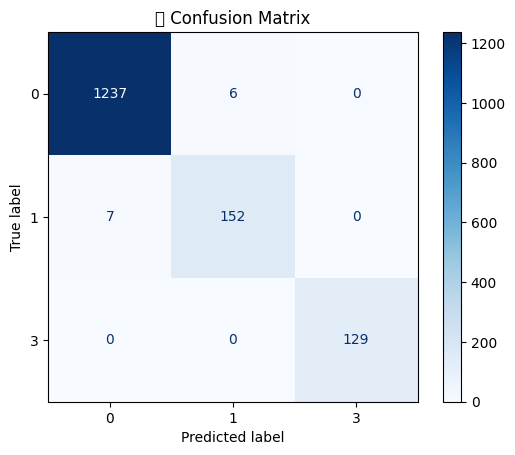

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


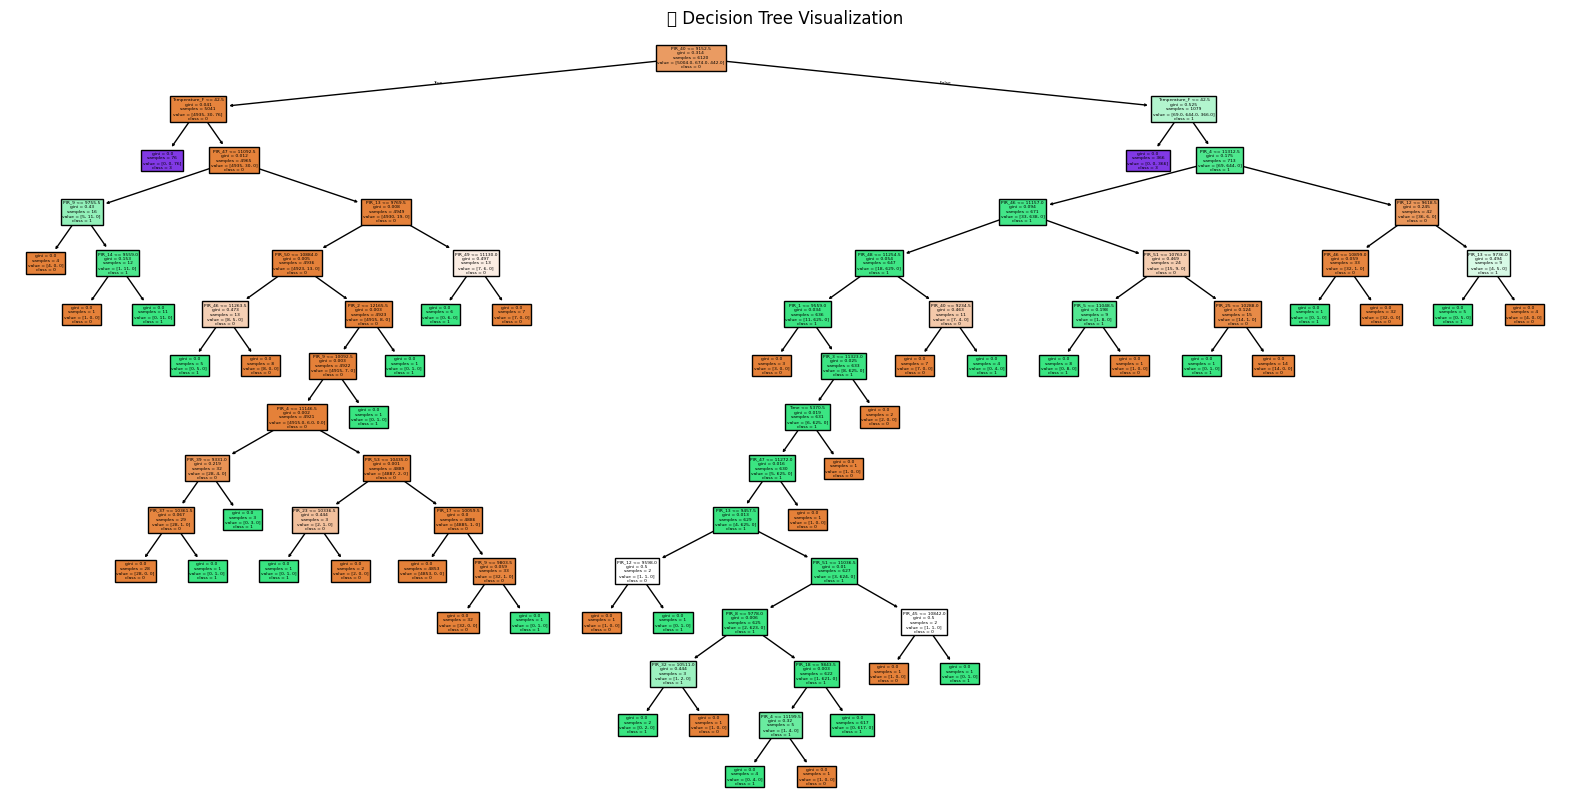

⚠️ ROC Curve & AUC can only be plotted for binary classification.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    roc_auc_score
)

# Step 1: Load the dataset
df = pd.read_csv('pirvision_office_dataset1.csv')  # Ensure this file is uploaded in Colab or in the same folder

# Step 2: Encode categorical variables
df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Step 3: Set features and target
target_column = 'Label'  # Change if your target column is different
X = df_encoded.drop(target_column, axis=1)
y = df_encoded[target_column]

# Step 4: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 5: Train Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Predictions and Evaluation
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title("🧮 Confusion Matrix")
plt.grid(False)
plt.show()

# Step 8: Visualize Decision Tree
plt.figure(figsize=(20, 10))
class_names_list = [str(c) for c in np.unique(y)] if len(np.unique(y)) <= 20 else None
plot_tree(model, feature_names=X.columns, class_names=class_names_list, filled=True)
plt.title("🌳 Decision Tree Visualization")
plt.show()

# Step 9: ROC Curve and AUC (binary only)
if len(np.unique(y)) == 2:
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('📈 Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    print("✅ AUC Score:", roc_auc_score(y_test, y_prob))
else:
    print("⚠️ ROC Curve & AUC can only be plotted for binary classification.")

logistic regression ,confusion matrix AUC AND ROC


--- Logistic Regression Results ---
✅ Accuracy: 0.9640757674722403

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1243
           1       0.93      0.79      0.85       159
           3       1.00      0.88      0.93       129

    accuracy                           0.96      1531
   macro avg       0.96      0.89      0.92      1531
weighted avg       0.96      0.96      0.96      1531



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


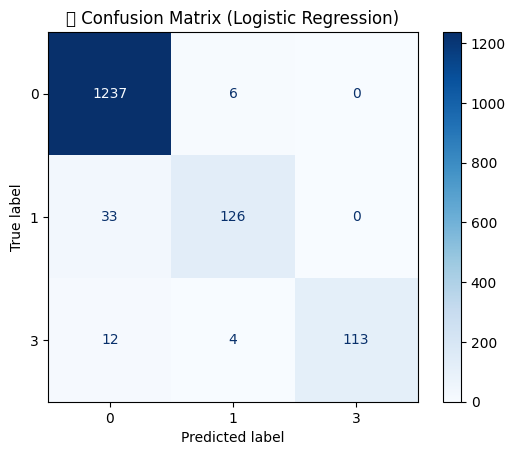

⚠️ ROC Curve & AUC can only be plotted for binary classification.


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    roc_auc_score
)
import matplotlib.pyplot as plt
import numpy as np

# Step 5: Train Logistic Regression Model (Replace Decision Tree)
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # Use a suitable solver
log_reg_model.fit(X_train, y_train)

# Step 6: Predictions and Evaluation for Logistic Regression
y_pred_log_reg = log_reg_model.predict(X_test)
print("\n--- Logistic Regression Results ---")
print("✅ Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Step 7: Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=np.unique(y))
disp_log_reg.plot(cmap=plt.cm.Blues)
plt.title("🧮 Confusion Matrix (Logistic Regression)")
plt.grid(False)
plt.show()

# Step 9: ROC Curve and AUC for Logistic Regression (binary only)
if len(np.unique(y)) == 2:
    y_prob_log_reg = log_reg_model.predict_proba(X_test)[:, 1]
    fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_prob_log_reg)
    roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

    plt.figure()
    plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_log_reg)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('📈 Receiver Operating Characteristic (ROC) (Logistic Regression)')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    print("✅ AUC Score (Logistic Regression):", roc_auc_score(y_test, y_prob_log_reg))
else:
    print("⚠️ ROC Curve & AUC can only be plotted for binary classification.")

# Note: The Decision Tree visualization part (Step 8) from the original code is excluded
# as it's specific to the Decision Tree model and not applicable to Logistic Regression.

KNN MODEL ,CONFUSION MATRIX AND ROC AND AUC


--- KNN Results ---
✅ Accuracy: 0.9601567602873938

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1243
           1       0.78      0.94      0.85       159
           3       0.97      0.67      0.79       129

    accuracy                           0.96      1531
   macro avg       0.91      0.87      0.88      1531
weighted avg       0.96      0.96      0.96      1531



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


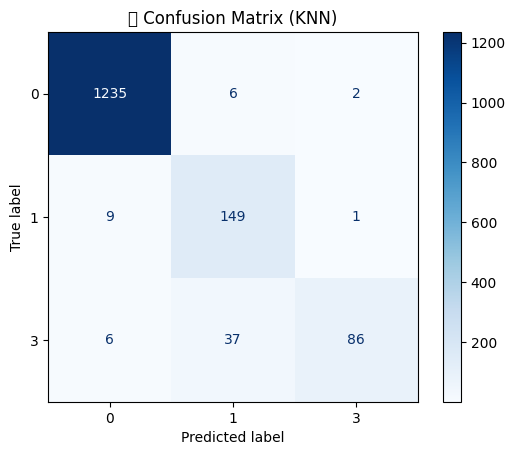

⚠️ ROC Curve & AUC can only be plotted for binary classification.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Step 5: Train KNN Model (Replace Decision Tree and Logistic Regression)
# You might need to experiment with the number of neighbors (n_neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Step 6: Predictions and Evaluation for KNN
y_pred_knn = knn_model.predict(X_test)
print("\n--- KNN Results ---")
print("✅ Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_knn))

# Step 7: Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=np.unique(y))
disp_knn.plot(cmap=plt.cm.Blues)
plt.title("🧮 Confusion Matrix (KNN)")
plt.grid(False)
plt.show()

# Step 9: ROC Curve and AUC for KNN (binary only)
if len(np.unique(y)) == 2:
    y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
    fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
    roc_auc_knn = auc(fpr_knn, tpr_knn)

    plt.figure()
    plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_knn)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('📈 Receiver Operating Characteristic (ROC) (KNN)')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    print("✅ AUC Score (KNN):", roc_auc_score(y_test, y_prob_knn))
else:
    print("⚠️ ROC Curve & AUC can only be plotted for binary classification.")
